<a href="https://colab.research.google.com/github/BradleyAgwa/Week-4-IP/blob/main/Electric_Car_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importing our libraries

In [ ]:
# Importing our pandas library 
import pandas as pd
# Importing our numpy library 
import numpy as np

# 1.1 Loading Our Datasets

In [ ]:
# We will read the dataset from our given url and store the dataframe in the variable autolib
url ="http://bit.ly/autolib_dataset"
autolib = pd.read_csv(url)


In [ ]:
# We will go ahead and preview our data
autolib.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [ ]:
# We will then go ahead and check our data info.
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [ ]:
# we will also get the general overview of our data by using describe()
autolib.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [ ]:
# we will get its shape too
autolib.shape

(5000, 25)

# 1.2 Data Cleaning

## Validity

In [ ]:
# Procedure 1:
# Data Cleaning Action: Droping the Displayed comment column
# Explanation: We are droping it since it has too many null values
#
autolib_new = autolib.drop(['Displayed comment'], axis=1, inplace=True)


In [ ]:
# Procedure 2:
# Data Cleaning Action: Droping the Status column
# Explanation: We are droping it since it is irrelevant to our analysis
#
autolib_new = autolib.drop(['Status'], axis=1, inplace=True)

In [ ]:
# Procedure 3:
# Data Cleaning Action: Droping the Subscription status column
# Explanation: We are droping it since it is irrelevant to our analysis
#
autolib_new = autolib.drop(['Subscription status'], axis=1, inplace=True)

In [ ]:
# Procedure 4:
# Data Cleaning Action: Droping the Scheduled at column
# Explanation: We are droping it since it is not needed in our analysis
#
autolib_new = autolib.drop(['Scheduled at'], axis=1, inplace=True)

In [ ]:
# Procedure 5:
# Data Cleaning Action: Droping the Geo point column
# Explanation: We are droping it since it is not needed in our analysis

autolib_new = autolib.drop(['Geo point'], axis=1, inplace=True)

In [ ]:
# Procedure 6:
# Data Cleaning Action: Droping the minute column
# Explanation: We are droping it since it is not needed in our analysis

autolib_new = autolib.drop(['minute'], axis=1, inplace=True)

In [ ]:
# Procedure 7:
# Data Cleaning Action: Droping ID column
# Explanation: We are droping it since it is not relevant to our analysis

autolib_new = autolib.drop(['ID'], axis=1, inplace=True)

In [ ]:
# Previewing our table.
autolib.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Kind,Postal code,Public name,Rental status,Slots,Station type,year,month,day,hour
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,2018,4,3,20
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,2018,4,4,4
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,2018,4,8,17


## Accuracy

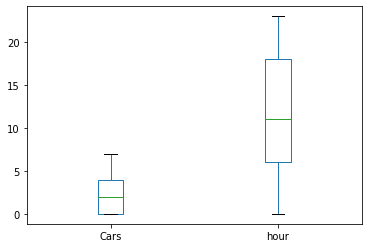

In [ ]:
# Procedure 1:
# Data Cleaning Action: Checking for outliers
# Explanation: This will assist us to understand how accurate our data is.
# We will first import the matplot library

import matplotlib.pyplot as plt 
% matplotlib inline

auto_matplotlib = autolib.boxplot(column =['Cars', 'hour'], grid = False)
auto_matplotlib

We can see there are no outliers in our data, thus proving accurate.

## Completeness

In [ ]:
# Procedure 1:
# Data Cleaning Action: Checking the count of null values if there is any
# Explanation: This will enables us to figure out if the data is complete thus easing manipulation

autolib.isnull().sum()

Address               0
Cars                  0
Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
Charge Slots          0
Charging Status       0
City                  0
ID                    0
Kind                  0
Postal code           0
Public name           0
Rental status         0
Slots                 0
Station type          0
year                  0
month                 0
day                   0
hour                  0
dtype: int64

From our data above we can see that we don't have any null values.

## Consistency

In [ ]:
# Procedure 1:
# Data Cleaning Action: Check for duplicate values.
# Explanation: This is to allow us determine data that is duplicated.
#
autolib_dup= autolib.duplicated().sum()
autolib_dup

26

In [ ]:
# Procedure 2:
# Data Cleaning Action: Dropping null values if they exist.
# Explanation: This is to allow us determine data that is duplicated.
#
auto_new = autolib.dropna(how="all")
auto_new.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,year,month,day,hour
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,2018,4,3,20
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,2018,4,4,4
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,2018,4,8,17


We have now cleared our data off any duplicated items

## Uniformity

In [ ]:
# Procedure 1:
# Data Cleaning Action: Converting column names to lowercase characters.
# Explanation: This is to allow for a uniform columns in the data column names.
#
auto_new.columns = auto_new.columns.str.rstrip().str.lower()
auto_new.head(5)

,address,cars,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,charging status,city,id,kind,postal code,public name,rental status,slots,station type,year,month,day,hour
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,2018,4,3,20
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,2018,4,4,4
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,2018,4,8,17


# 1.3 Data Analysis

### Blue Cars

Here we are now going to answer the given analysis questions as we try to get to our end goal.

In [ ]:
# Question 1
# What was the most popular hour of the day for picking up a shared electric car(Bluecar),
# in the city of Paris over the Month of April?

paris=auto_new[(auto_new['city']=='Paris') & (auto_new['bluecar counter']>0) & (auto_new['rental status']=='operational')]

paris.groupby(['hour'])['bluecar counter'].sum().sort_values(ascending=False).head(3)

hour
21    268
6     260
12    250
Name: bluecar counter, dtype: int64

We can clearly see that 21:00 was the most popular hour for picking up a shared car

In [ ]:
# Question 2
# What is the most popular hour for returning cars?



In [ ]:
# Question 3
# What station is the most popular overally?

popular_station=auto_new.groupby(['public name'])['cars'].sum().sort_values(ascending=False).head(3)
popular_station

public name
Fontenay-aux-Roses/Robert Marchand/32    50
Le Plessis-Robinson/GalilÃ©e/16          49
Fontenay-aux-Roses/Lombard/20            47
Name: cars, dtype: int64

Fontenay-aux-Roses/Robert Marchand/32 is the most popular station

In [ ]:
# Question 4
# What station is the most popular?
# At the most popular picking hour?

df_p =auto_new[(auto_new['rental status']=='operational')]
pop_pick_hour=df_p.groupby(['public name','hour'])['cars'].sum().sort_values(ascending=False)

pop_pick_hour.head(3)

public name                 hour
Courbevoie/Paix/2           2       15
Paris/Porte de Villiers/28  8       15
Saint-Ouen/Louis Blanc/35   2       14
Name: cars, dtype: int64

Courbevoie/Paix/2 and Paris/Porte de Villiers/28  are the most popular stations at the most popular picking hour for all the cars.

In [ ]:
# Question 5
# What postal code is the most popular for picking up Blue cars? 

postal_code=auto_new.groupby(['postal code'])['bluecar counter'].sum().sort_values(ascending=False)

postal_code.head(3)


postal code
75015    609
75016    595
75017    529
Name: bluecar counter, dtype: int64

75015 is the most popular code for the blue cars

In [ ]:
# Continuation of question 5
# Does the most popular station belong to that postal code?

popular_station_code=auto_new.groupby(['public name', 'postal code'])['cars'].sum().sort_values(ascending=False).head(3)
popular_station_code

public name                            postal code
Fontenay-aux-Roses/Robert Marchand/32  92260          50
Le Plessis-Robinson/GalilÃ©e/16        92350          49
Fontenay-aux-Roses/Lombard/20          92260          47
Name: cars, dtype: int64

The most popular station doesn't belong to the most popular code for the blue cars.

### Utilib counter and Utilib 1.4 

In [ ]:
# Question 7
# Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?
# What postal code is the most popular for picking up Utilib cars?

utilib=auto_new.groupby(['postal code'])['utilib counter'].sum().sort_values(ascending=False)
utilib.head(3)

postal code
75017    20
75016    20
75015    20
Name: utilib counter, dtype: int64

75017 is the most popular code for the utilib cars

In [ ]:
# Question 8
# What postal code is the most popular for picking up Utilib 1.4 cars?

utilib_overall=auto_new.groupby(['postal code'])['utilib 1.4 counter'].sum().sort_values(ascending=False)
utilib_overall.head(3)

postal code
75017    40
75015    34
75019    33
Name: utilib 1.4 counter, dtype: int64

Our popular postal code remains the same.

In [ ]:
# Question 9
# What is the most popular code at the most popular picking hour for the utilib cars?
utilib_cars = auto_new[(auto_new['rental status']=='operational')]
utilib_cars.groupby(['postal code','hour'])['utilib counter'].sum().sort_values(ascending=False).head(3)


postal code  hour
75015        7       3
75011        6       3
75020        6       3
Name: utilib counter, dtype: int64

If we consider the most popular hour it changes to 75015

In [ ]:
# Question 10
# What is the most popular code at the most popular picking hour for the utilib 1.4 cars?
utilib1_4_cars = auto_new[(auto_new['rental status']=='operational')]
utilib1_4_cars.groupby(['postal code','hour'])['utilib 1.4 counter'].sum().sort_values(ascending=False).head(3)

postal code  hour
92310        0       6
75014        21      6
75019        10      5
Name: utilib 1.4 counter, dtype: int64

For the Utilib 1.4 we get 92310

# 1.4 Recommendation

Since we were to identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018, which we found out to be 21:00, the company should give this time increased attention. 
By doing that they'll be able to bring in more profits.